# DATATHON - MACHINE LEARNING

***

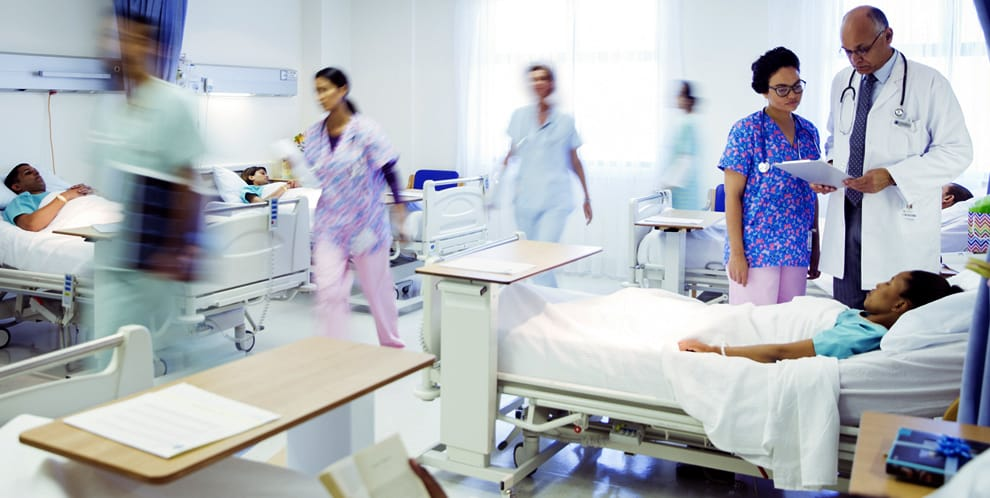

***

## Descripción del problema

Un importante Centro de Salud lo ha contratado con el fin de poder predecir si un paciente tendrá una estancia hospitalaria prolongada o no, utilizando la información contenida en el dataset asociado, la cual recaba una muestra histórica de sus pacientes, para poder administrar la demanda de camas en el hospital según la condición de los pacientes recientemente ingresados.

Para esto, se define que un paciente posee estancia hospitalaria prolongada si ha estado hospitalizado más de 8 días. Por lo que debe generar dicha variable categórica y luego categorizar los pacientes según las variables que usted considere necesarias, justificando dicha elección.​

****

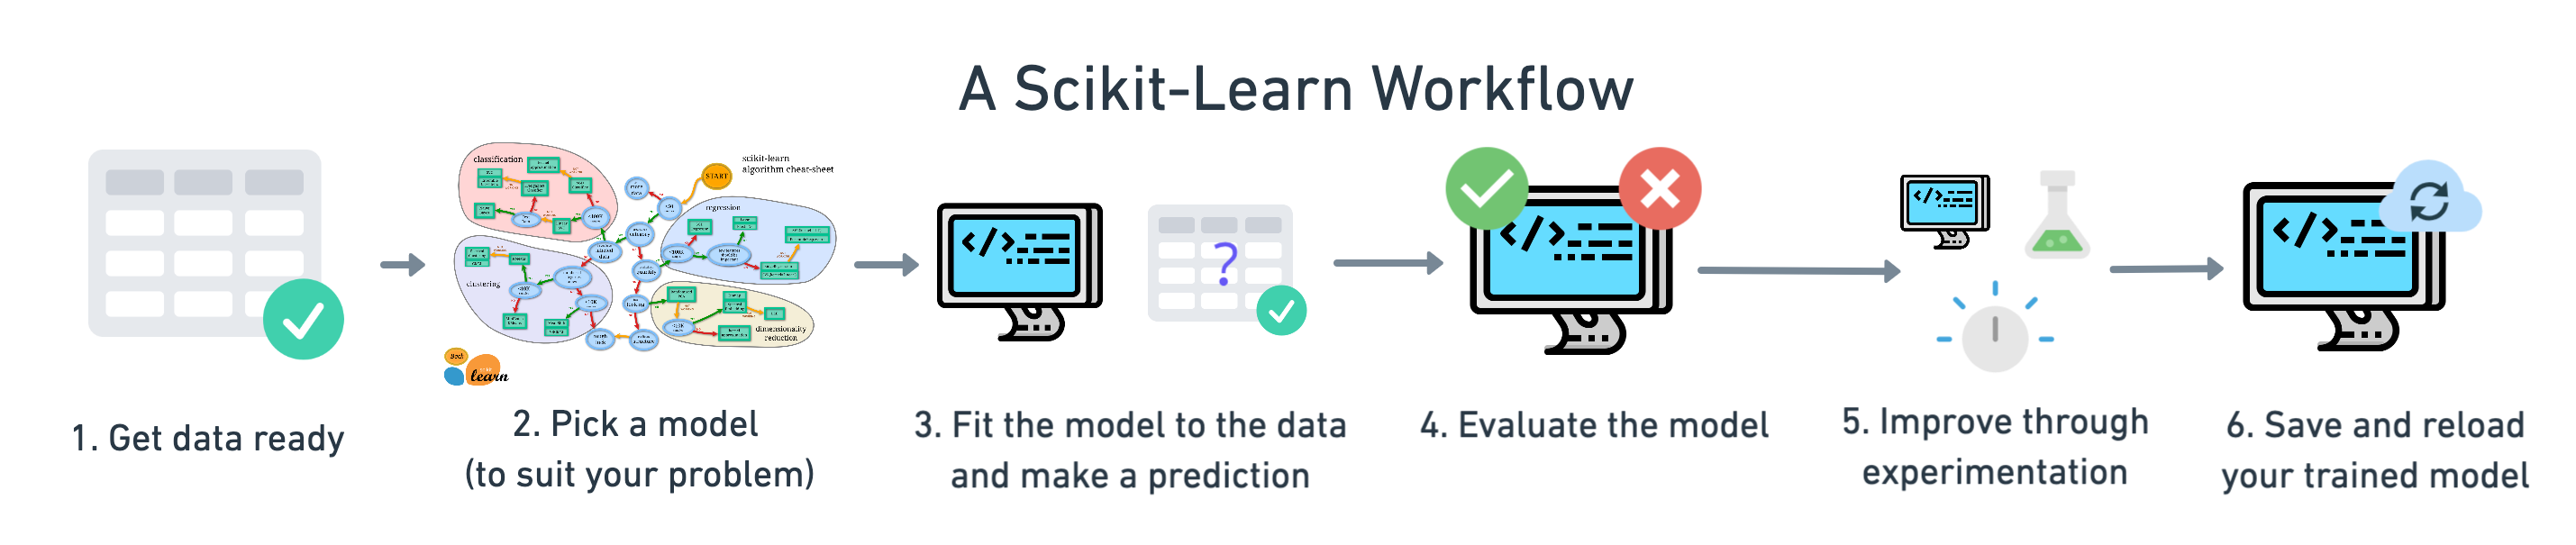

## 1. Preparando las herramientas

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***

## 2. Carga de data

In [131]:
df_analisis = pd.read_csv("./data/hospitalizaciones_train.csv")

df_analisis

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.41,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.84,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.73,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.15,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.27,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.29,8
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4772.00,9
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.99,9
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.58,9


***

## 3. Exploratory Data Analysis (EDA)

In [132]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [133]:
df_analisis.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

## 3.1 Normalizamos la data

In [134]:
df_analisis.rename(columns = {'Available Extra Rooms in Hospital':'habitaciones_disponibles',
                              'Department':'area',
                              'Ward_Facility_Code':'codigo_habitacion',
                              'doctor_name':'nombre_dr',
                              'staff_available':'personal_disponible',
                              'patientid': 'id_paciente',
                              'Age':'edad',
                              'gender':'genero',
                              'Type of Admission':'tipo_ingreso',
                              'Severity of Illness':'gravedad_condicion',
                              'health_conditions':'enfermedad_preexistente',
                              'Visitors with Patient':'visitantes_paciente',
                              'Insurance':'seguro_medico',
                              'Admission_Deposit':'pago_inicial',
                              'Stay (in days)':'cant_dias_internacion'}, inplace=True)

df_analisis.head()

,habitaciones_disponibles,area,codigo_habitacion,nombre_dr,personal_disponible,id_paciente,edad,genero,tipo_ingreso,gravedad_condicion,enfermedad_preexistente,visitantes_paciente,seguro_medico,pago_inicial,cant_dias_internacion
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.41,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.84,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.73,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.15,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.27,34


In [135]:
# Con LabelEncoder se transforman los features que no son categóricos
le = LabelEncoder()

df_analisis[['habitaciones_disponibles', 
             'personal_disponible', 
             'edad', 'genero', 
             'visitantes_paciente', 
             'seguro_medico', 'pago_inicial', 
             'cant_dias_internacion']] = df_analisis[['habitaciones_disponibles', 
                                                      'personal_disponible', 
                                                      'edad', 'genero', 
                                                      'visitantes_paciente', 
                                                      'seguro_medico', 'pago_inicial', 
                                                      'cant_dias_internacion']].apply(le.fit_transform)

df_analisis

,habitaciones_disponibles,area,codigo_habitacion,nombre_dr,personal_disponible,id_paciente,edad,genero,tipo_ingreso,gravedad_condicion,enfermedad_preexistente,visitantes_paciente,seguro_medico,pago_inicial,cant_dias_internacion
0,4,gynecology,D,Dr Sophia,0,33070,4,0,Trauma,Extreme,Diabetes,4,1,11165,5
1,4,gynecology,B,Dr Sophia,2,34808,3,0,Trauma,Minor,Heart disease,2,0,36653,6
2,2,gynecology,B,Dr Sophia,8,44577,2,0,Trauma,Extreme,Diabetes,2,1,350018,4
3,4,gynecology,D,Dr Olivia,7,3695,3,0,Urgent,Moderate,None,4,0,255384,5
4,2,anesthesia,E,Dr Mark,10,108956,7,1,Trauma,Moderate,Diabetes,2,0,316256,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,63105,3,0,Trauma,Minor,Asthama,3,1,76278,5
409996,5,gynecology,D,Dr Nathan,5,129292,2,0,Trauma,Extreme,Other,4,0,244107,6
409997,4,gynecology,D,Dr Sarah,9,11399,2,0,Emergency,Minor,Asthama,4,1,63179,6
409998,10,gynecology,D,Dr Olivia,10,75003,2,0,Trauma,Moderate,Other,2,1,66863,6


In [137]:
# Con OneHotEncoder se transforman los features categóricos
categoricos = ['area', 'codigo_habitacion',
               'nombre_dr', 'tipo_ingreso', 'gravedad_condicion', 
               'enfermedad_preexistente']

one_hot = OneHotEncoder()

transformador = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categoricos)],
                                   remainder='passthrough')

transformado = transformador.fit_transform(df_analisis)

df_analisis_transformado = pd.DataFrame(transformado, columns=transformador.get_feature_names_out())

df_analisis_transformado

,one_hot__area_TB & Chest disease,one_hot__area_anesthesia,one_hot__area_gynecology,one_hot__area_radiotherapy,one_hot__area_surgery,one_hot__codigo_habitacion_A,one_hot__codigo_habitacion_B,one_hot__codigo_habitacion_C,one_hot__codigo_habitacion_D,one_hot__codigo_habitacion_E,...,one_hot__enfermedad_preexistente_Other,remainder__habitaciones_disponibles,remainder__personal_disponible,remainder__id_paciente,remainder__edad,remainder__genero,remainder__visitantes_paciente,remainder__seguro_medico,remainder__pago_inicial,remainder__cant_dias_internacion
0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,4.00,0.00,33070.00,4.00,0.00,4.00,1.00,11165.00,5.00
1,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,4.00,2.00,34808.00,3.00,0.00,2.00,0.00,36653.00,6.00
2,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,2.00,8.00,44577.00,2.00,0.00,2.00,1.00,350018.00,4.00
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,4.00,7.00,3695.00,3.00,0.00,4.00,0.00,255384.00,5.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,2.00,10.00,108956.00,7.00,1.00,2.00,0.00,316256.00,31.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,1.00,63105.00,3.00,0.00,3.00,1.00,76278.00,5.00
409996,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,5.00,5.00,129292.00,2.00,0.00,4.00,0.00,244107.00,6.00
409997,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,4.00,9.00,11399.00,2.00,0.00,4.00,1.00,63179.00,6.00
409998,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,10.00,10.00,75003.00,2.00,0.00,2.00,1.00,66863.00,6.00


## 3.2 Chequeamos las correlaciones entre features

In [138]:
df_analisis_transformado.corr()['remainder__cant_dias_internacion']

one_hot__area_TB & Chest disease                        0.24
one_hot__area_anesthesia                                0.60
one_hot__area_gynecology                               -0.70
one_hot__area_radiotherapy                              0.22
one_hot__area_surgery                                   0.23
one_hot__codigo_habitacion_A                            0.41
one_hot__codigo_habitacion_B                           -0.24
one_hot__codigo_habitacion_C                            0.17
one_hot__codigo_habitacion_D                           -0.26
one_hot__codigo_habitacion_E                            0.45
one_hot__codigo_habitacion_F                           -0.27
one_hot__nombre_dr_Dr Isaac                             0.20
one_hot__nombre_dr_Dr John                              0.30
one_hot__nombre_dr_Dr Mark                              0.54
one_hot__nombre_dr_Dr Nathan                           -0.20
one_hot__nombre_dr_Dr Olivia                           -0.24
one_hot__nombre_dr_Dr Sa

<AxesSubplot: >

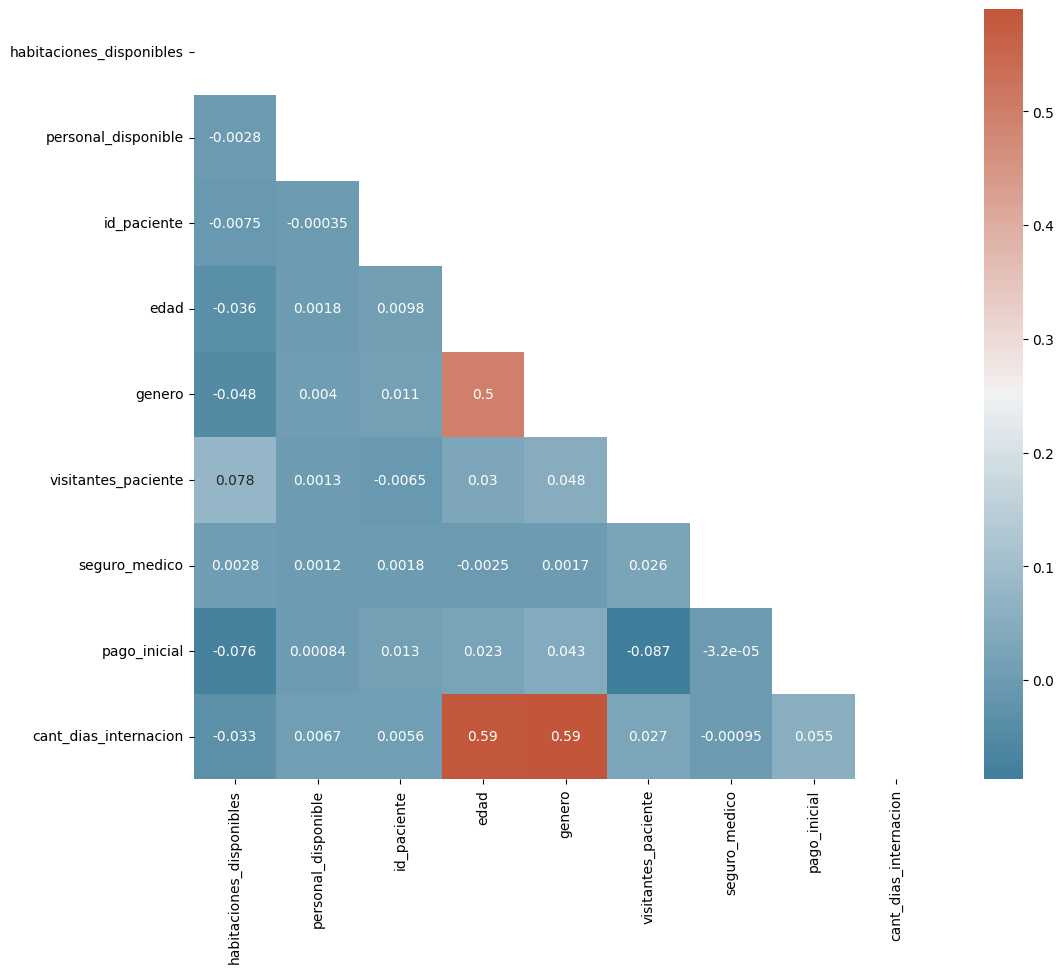

In [139]:
corr = df_analisis.corr()

f, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

***

## 4. Cargamos el DataFrame de training

In [75]:
df_training_analizado = pd.read_csv("./data/hospitalizaciones_train.csv")

# Agregamos una columna "pred" donde alojamos los resultados clasificatorios binarios
pred = []

for row in df_training_analizado['Stay (in days)']:
    if row <= 8:
        pred.append(0)
    else:
        pred.append(1)
        
df_training_analizado['pred'] = pred

df_training_analizado.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),pred
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.41,8,0
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.84,9,1
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.73,7,0
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.15,8,0
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.27,34,1


## 4.1 Standarizamos la data de entrenamiento

In [76]:
# Renombrado de columnas
df_training_analizado.rename(columns = {'Available Extra Rooms in Hospital':'habitaciones_disponibles',
                              'Department':'area',
                              'Ward_Facility_Code':'codigo_habitacion',
                              'doctor_name':'nombre_dr',
                              'staff_available':'personal_disponible',
                              'patientid': 'id_paciente',
                              'Age':'edad',
                              'gender':'genero',
                              'Type of Admission':'tipo_ingreso',
                              'Severity of Illness':'gravedad_condicion',
                              'health_conditions':'enfermedad_preexistente',
                              'Visitors with Patient':'visitantes_paciente',
                              'Insurance':'seguro_medico',
                              'Admission_Deposit':'pago_inicial',
                              'Stay (in days)':'cant_dias_internacion'}, inplace=True)


# Label Encoder
le = LabelEncoder()

df_training_analizado[['edad', 'genero', 'habitaciones_disponibles', 
             'personal_disponible', 
             'visitantes_paciente', 
             'seguro_medico', 'pago_inicial']] = df_training_analizado[['edad', 'genero', 'habitaciones_disponibles', 
                                                      'personal_disponible', 
                                                      'visitantes_paciente', 
                                                      'seguro_medico', 'pago_inicial']].apply(le.fit_transform)


# OneHotEncoder
categoricos = ['area', 'codigo_habitacion',
               'nombre_dr', 'tipo_ingreso', 'gravedad_condicion', 
               'enfermedad_preexistente']

one_hot = OneHotEncoder()

transformador = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categoricos)],
                                   remainder='passthrough')

transformado = transformador.fit_transform(df_training_analizado)

df_transformado_final = pd.DataFrame(transformado, columns=transformador.get_feature_names_out())

df_transformado_final

,one_hot__area_TB & Chest disease,one_hot__area_anesthesia,one_hot__area_gynecology,one_hot__area_radiotherapy,one_hot__area_surgery,one_hot__codigo_habitacion_A,one_hot__codigo_habitacion_B,one_hot__codigo_habitacion_C,one_hot__codigo_habitacion_D,one_hot__codigo_habitacion_E,...,remainder__habitaciones_disponibles,remainder__personal_disponible,remainder__id_paciente,remainder__edad,remainder__genero,remainder__visitantes_paciente,remainder__seguro_medico,remainder__pago_inicial,remainder__cant_dias_internacion,remainder__pred
0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,4.00,0.00,33070.00,4.00,0.00,4.00,1.00,11165.00,8.00,0.00
1,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,4.00,2.00,34808.00,3.00,0.00,2.00,0.00,36653.00,9.00,1.00
2,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,2.00,8.00,44577.00,2.00,0.00,2.00,1.00,350018.00,7.00,0.00
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,4.00,7.00,3695.00,3.00,0.00,4.00,0.00,255384.00,8.00,0.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,2.00,10.00,108956.00,7.00,1.00,2.00,0.00,316256.00,34.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,1.00,63105.00,3.00,0.00,3.00,1.00,76278.00,8.00,0.00
409996,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,5.00,5.00,129292.00,2.00,0.00,4.00,0.00,244107.00,9.00,1.00
409997,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,4.00,9.00,11399.00,2.00,0.00,4.00,1.00,63179.00,9.00,1.00
409998,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,10.00,10.00,75003.00,2.00,0.00,2.00,1.00,66863.00,9.00,1.00


In [77]:
df_transformado_final = df_transformado_final.drop(['remainder__cant_dias_internacion', 'remainder__id_paciente'], axis=1)

df_transformado_final

,one_hot__area_TB & Chest disease,one_hot__area_anesthesia,one_hot__area_gynecology,one_hot__area_radiotherapy,one_hot__area_surgery,one_hot__codigo_habitacion_A,one_hot__codigo_habitacion_B,one_hot__codigo_habitacion_C,one_hot__codigo_habitacion_D,one_hot__codigo_habitacion_E,...,one_hot__enfermedad_preexistente_None,one_hot__enfermedad_preexistente_Other,remainder__habitaciones_disponibles,remainder__personal_disponible,remainder__edad,remainder__genero,remainder__visitantes_paciente,remainder__seguro_medico,remainder__pago_inicial,remainder__pred
0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,4.00,0.00,4.00,0.00,4.00,1.00,11165.00,0.00
1,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,4.00,2.00,3.00,0.00,2.00,0.00,36653.00,1.00
2,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,2.00,8.00,2.00,0.00,2.00,1.00,350018.00,0.00
3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,1.00,0.00,4.00,7.00,3.00,0.00,4.00,0.00,255384.00,0.00
4,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,2.00,10.00,7.00,1.00,2.00,0.00,316256.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,1.00,1.00,3.00,0.00,3.00,1.00,76278.00,0.00
409996,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,5.00,5.00,2.00,0.00,4.00,0.00,244107.00,1.00
409997,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,4.00,9.00,2.00,0.00,4.00,1.00,63179.00,1.00
409998,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,10.00,10.00,2.00,0.00,2.00,1.00,66863.00,1.00


In [78]:
X = df_transformado_final.drop(['remainder__pred'], axis=1)
y = df_transformado_final['remainder__pred']

In [79]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()

X = escalador.fit_transform(X)

In [80]:
X

array([[-0.21937238, -0.31143212,  0.67515677, ...,  0.20135317,
         0.45179103, -1.63772636],
       [-0.21937238, -0.31143212,  0.67515677, ..., -0.69552829,
        -2.21341268, -1.42217717],
       [-0.21937238, -0.31143212,  0.67515677, ..., -0.69552829,
         0.45179103,  1.22791583],
       ...,
       [-0.21937238, -0.31143212,  0.67515677, ...,  0.20135317,
         0.45179103, -1.19784974],
       [-0.21937238, -0.31143212,  0.67515677, ..., -0.69552829,
         0.45179103, -1.16669456],
       [-0.21937238, -0.31143212,  0.67515677, ...,  1.9951161 ,
         0.45179103, -0.5137297 ]])

In [81]:
y

0        0.00
1        1.00
2        0.00
3        0.00
4        1.00
         ... 
409995   0.00
409996   1.00
409997   1.00
409998   1.00
409999   0.00
Name: remainder__pred, Length: 410000, dtype: float64

****

## 5. Comienza la evaluación de la data con modelos ML

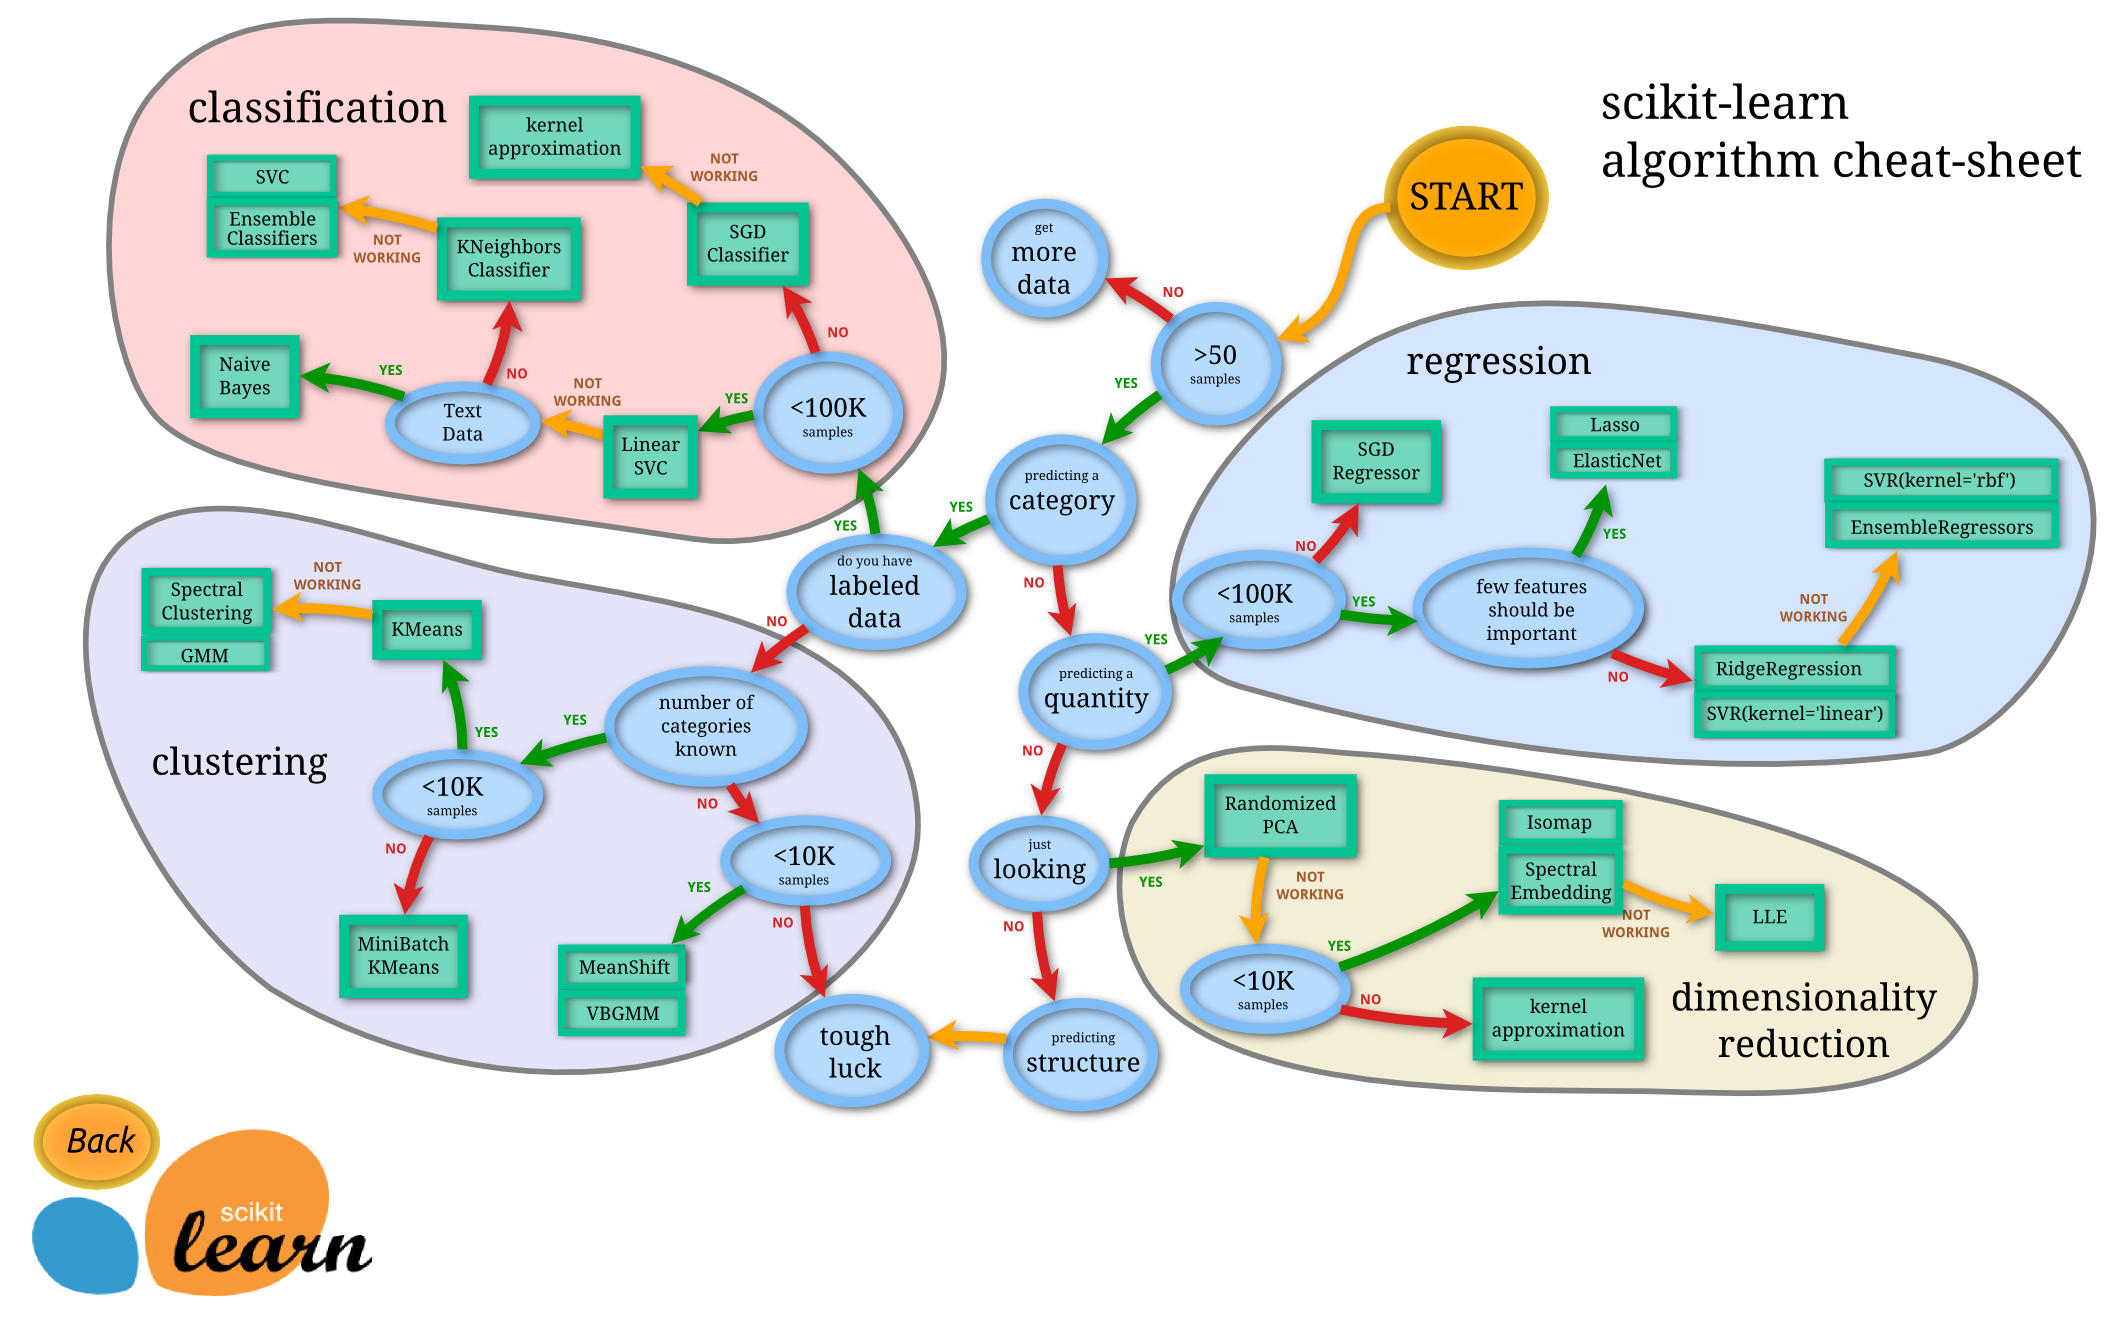

***

En base a lo leído en la documentación de Scikit-Learn, según nuestros tipos de datos, el tipo de información que se necesita predecir y la cantidad de datos que tenemos, la mejor elección es ir por un modelo de ''CLASIFICACIÓN''

***

### SGD Classifier

In [97]:
from sklearn.linear_model import SGDClassifier

X_sgdc = X

X_train, X_test, y_train, y_test = train_test_split(X_sgdc,
                                                   y,
                                                   test_size=0.2)

sgdc = SGDClassifier(n_jobs=-1)

sgdc.fit(X_train, y_train)

sgdc.score(X_train, y_train)

0.6235609756097561

In [99]:
# Creamos una función para imprimir los scores de los distintos modelos
def evalua_pred(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [101]:
sgdc_metrics = evalua_pred(y_test, sgdc.predict(X_test))

Acc: 62.16%
Precision: 0.62
Recall: 1.00
F1 score: 0.77


***

### Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

X_rfc = X

X_train, X_test, y_train, y_test = train_test_split(X_rfc,
                                                   y,
                                                   test_size=0.2)

rfc = RandomForestClassifier(n_jobs=-1)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.7573414634146342

In [104]:
rfc_metrics = evalua_pred(y_test, rfc.predict(X_test))

Acc: 75.73%
Precision: 0.80
Recall: 0.82
F1 score: 0.81


### *Tuneando Hiperparámetros del Modelo RandomForestClassifier*

In [58]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

clf = RandomForestClassifier(n_jobs=-1)

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  13.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  11.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  11.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  11.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  11.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  49.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=  48.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [59]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None}

In [107]:
X_rfc = X

X_train, X_test, y_train, y_test = train_test_split(X_rfc,
                                                   y,
                                                   test_size=0.2)

rfc_mejorado = RandomForestClassifier(n_estimators=1200,
                             min_samples_split=6,
                             min_samples_leaf=4,
                             max_features='sqrt',
                             max_depth=None,
                             n_jobs=-1)

rfc_mejorado.fit(X_train, y_train)

rfc_mejorado.score(X_test, y_test)

0.7733292682926829

In [108]:
rfc_mejorado_metrics = evalua_pred(y_test, rfc_mejorado.predict(X_test))

Acc: 77.33%
Precision: 0.80
Recall: 0.85
F1 score: 0.82


***

### Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier

X_dtc = X

X_train, X_test, y_train, y_test = train_test_split(X_dtc,
                                                   y,
                                                   test_size=0.2)

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

dtc.score(X_test, y_test)

0.7661219512195122

In [110]:
dtc_metrics = evalua_pred(y_test, dtc.predict(X_test))

Acc: 76.61%
Precision: 0.81
Recall: 0.81
F1 score: 0.81


In [111]:
from sklearn.tree import DecisionTreeClassifier

X_dtc_mejorado = X

X_train, X_test, y_train, y_test = train_test_split(X_dtc_mejorado,
                                                   y,
                                                   test_size=0.2)

dtc_mejorado = DecisionTreeClassifier(splitter='best',
                                     random_state=123,
                                     min_samples_split=4,
                                     min_samples_leaf=4,
                                     max_leaf_nodes=None,
                                     max_depth=None,
                                     criterion='log_loss')

dtc_mejorado.fit(X_train, y_train)

dtc_mejorado.score(X_test, y_test)

0.771670731707317

In [112]:
dtc_mejorado_metrics = evalua_pred(y_test, dtc_mejorado.predict(X_test))

Acc: 77.17%
Precision: 0.83
Recall: 0.80
F1 score: 0.81


### *Tuneando Hiperparámetros del DecisionTreeClassifier*

In [114]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"criterion": ['gini', 'entropy', 'log_loss'],
       "splitter": ['best', 'random'],
       "max_depth": [5, 10, 15],
       "min_samples_split": [1, 2, 3, 4, 5, 6],
       "min_samples_leaf": [1, 2, 4],
       "max_leaf_nodes": [5, 10, 15],
       "random_state": [123]}

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

dtc = DecisionTreeClassifier()

rs_dtc = RandomizedSearchCV(estimator=dtc,
                           param_distributions=grid,
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

rs_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [5, 10, 15],
                                        'max_leaf_nodes': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6],
                                        'random_state': [123],
                                        'splitter': ['best', 'random']},
                   verbose=2)

In [115]:
rs_dtc.best_params_

{'splitter': 'best',
 'random_state': 123,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_leaf_nodes': 15,
 'max_depth': 10,
 'criterion': 'entropy'}

In [116]:
from sklearn.tree import DecisionTreeClassifier

X_dtc_mejorado_2 = X

X_train, X_test, y_train, y_test = train_test_split(X_dtc_mejorado_2,
                                                   y,
                                                   test_size=0.2)

dtc_mejorado_2 = DecisionTreeClassifier(splitter='best',
                                     random_state=123,
                                     min_samples_split=5,
                                     min_samples_leaf=4,
                                     max_leaf_nodes=15,
                                     max_depth=10,
                                     criterion='entropy')

dtc_mejorado_2.fit(X_train, y_train)

dtc_mejorado_2.score(X_test, y_test)

0.7084756097560976

In [117]:
dtc_mejorado_2_metrics = evalua_pred(y_test, dtc_mejorado_2.predict(X_test))

Acc: 70.85%
Precision: 0.72
Recall: 0.87
F1 score: 0.79


***

### Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

np.random.seed(42)

X_lr = X

X_train, X_test, y_train, y_test = train_test_split(X_lr,
                                                   y,
                                                   test_size=0.3)

logis_reg = LogisticRegression()

logis_reg.fit(X_train, y_train)

logis_reg.score(X_test, y_test)

0.608739837398374

In [119]:
logis_reg_metrics = evalua_pred(y_test, logis_reg.predict(X_test))

Acc: 60.87%
Precision: 0.65
Recall: 0.80
F1 score: 0.72


***

### LIGHT GBM

In [69]:
pip install lightgbm


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
from lightgbm import LGBMClassifier

np.random.seed(42)

X_lgbm = X

X_train, X_test, y_train, y_test = train_test_split(X_lgbm,
                                                   y,
                                                   test_size=0.2)

lgbm = LGBMClassifier()

lgbm.fit(X_train, y_train)

lgbm.score(X_test, y_test)

0.7590853658536585

In [121]:
lgbm_metrics = evalua_pred(y_test, lgbm.predict(X_test))

Acc: 75.91%
Precision: 0.79
Recall: 0.84
F1 score: 0.81


In [122]:
from lightgbm import LGBMClassifier

X_lgbm_mejorado = X

X_train, X_test, y_train, y_test = train_test_split(X_lgbm_mejorado,
                                                   y,
                                                   test_size=0.2)

lgbm_mejorado = LGBMClassifier(objective='binary',
                              n_jobs=-1,
                              random_state=123,
                              num_leaves=90)

lgbm_mejorado.fit(X_train, y_train)

lgbm_mejorado.score(X_test, y_test)

0.7854634146341464

In [123]:
lgbm_metrics_mejorado = evalua_pred(y_test, lgbm_mejorado.predict(X_test))

Acc: 78.55%
Precision: 0.82
Recall: 0.85
F1 score: 0.83


***

### Ridge Classifier

In [124]:
from sklearn.linear_model import RidgeClassifier

X_ridge = X

X_train, X_test, y_train, y_test = train_test_split(X_ridge,
                                                   y,
                                                   test_size=0.2)

ridge = RidgeClassifier()

ridge.fit(X_train, y_train)

ridge.score(X_test, y_test)

0.6118170731707318

In [125]:
ridge_metrics = evalua_pred(y_test, ridge.predict(X_test))

Acc: 61.18%
Precision: 0.64
Recall: 0.87
F1 score: 0.74


***

## 6. Comparamos las metricas de todos los modelos

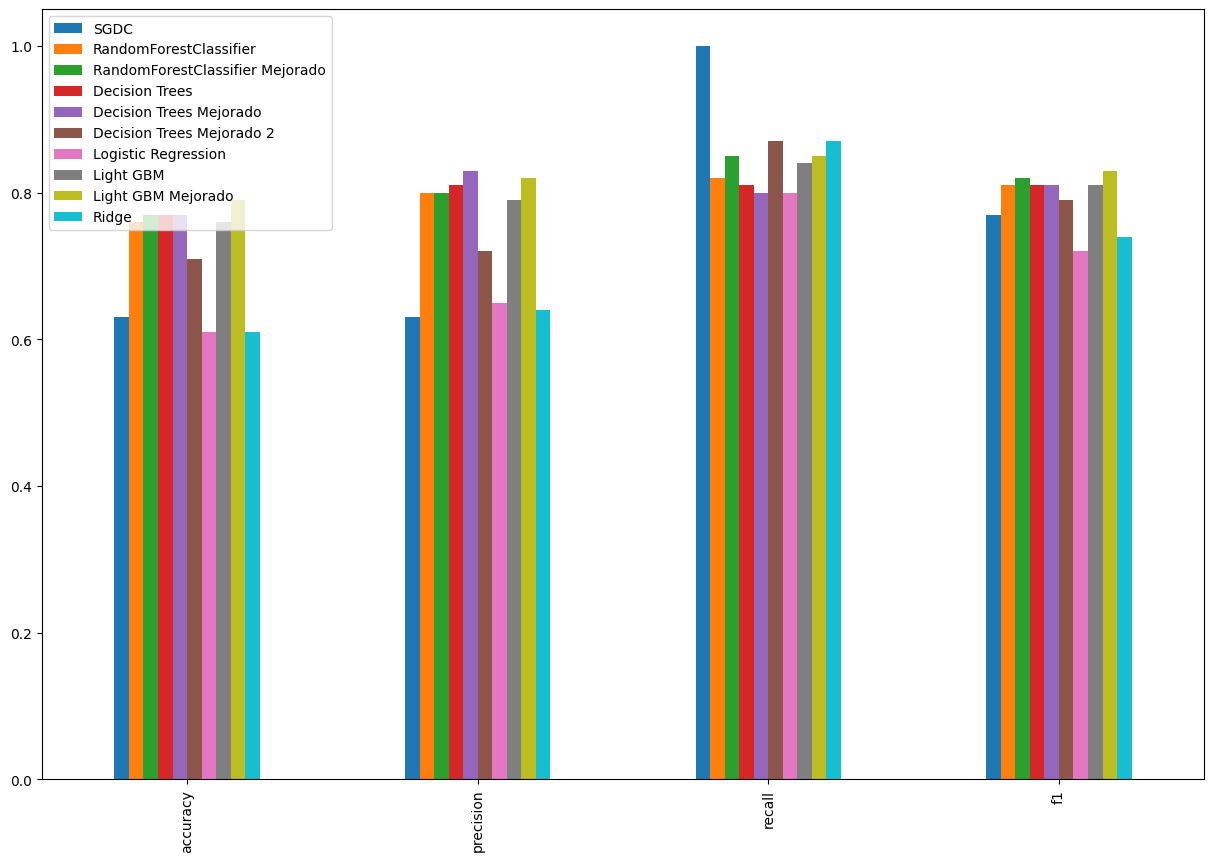

In [129]:
compare_metrics = pd.DataFrame({"SGDC": sgdc_metrics,
                                "RandomForestClassifier": rfc_metrics,
                                "RandomForestClassifier Mejorado": rfc_mejorado_metrics,
                               "Decision Trees": dtc_metrics,
                               "Decision Trees Mejorado": dtc_mejorado_metrics,
                               "Decision Trees Mejorado 2": dtc_mejorado_2_metrics,
                               "Logistic Regression": logis_reg_metrics,
                               "Light GBM": lgbm_metrics,
                               "Light GBM Mejorado": lgbm_metrics_mejorado,
                               "Ridge": ridge_metrics})
compare_metrics.plot.bar(figsize=(15, 10));

***

## 7. Cargamos la data para testeo y la normalizamos

In [54]:
df_test = pd.read_csv("./data/hospitalizaciones_test.csv")

In [55]:
# Renombramos columnas
df_test.rename(columns = {'Available Extra Rooms in Hospital':'habitaciones_disponibles',
                              'Department':'area',
                              'Ward_Facility_Code':'codigo_habitacion',
                              'doctor_name':'nombre_dr',
                              'staff_available':'personal_disponible',
                              'patientid': 'id_paciente',
                              'Age':'edad',
                              'gender':'genero',
                              'Type of Admission':'tipo_ingreso',
                              'Severity of Illness':'gravedad_condicion',
                              'health_conditions':'enfermedad_preexistente',
                              'Visitors with Patient':'visitantes_paciente',
                              'Insurance':'seguro_medico',
                              'Admission_Deposit':'pago_inicial'}, inplace=True)

# Label Encoder
le_test = LabelEncoder()

df_test[['habitaciones_disponibles', 
             'personal_disponible', 
             'edad', 'genero', 
             'visitantes_paciente', 
             'seguro_medico', 'pago_inicial']] = df_test[['habitaciones_disponibles', 
                                                      'personal_disponible', 
                                                      'edad', 'genero', 
                                                      'visitantes_paciente', 
                                                      'seguro_medico', 'pago_inicial']].apply(le_test.fit_transform)

# Dropeamos id_paciente
df_test = df_test.drop(['id_paciente', ''], axis=1)

# OneHotEncoder
categoricos_test = ['area', 'codigo_habitacion',
               'nombre_dr', 'tipo_ingreso', 'gravedad_condicion', 
               'enfermedad_preexistente']

one_hot_test = OneHotEncoder()

transformador_test = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categoricos_test)],
                                   remainder='passthrough')

transformado_test = transformador_test.fit_transform(df_test)

df_test_final = pd.DataFrame(transformado_test, columns=transformador_test.get_feature_names_out())

df_test_final

,one_hot__area_TB & Chest disease,one_hot__area_anesthesia,one_hot__area_gynecology,one_hot__area_radiotherapy,one_hot__area_surgery,one_hot__codigo_habitacion_A,one_hot__codigo_habitacion_B,one_hot__codigo_habitacion_C,one_hot__codigo_habitacion_D,one_hot__codigo_habitacion_E,...,one_hot__enfermedad_preexistente_High Blood Pressure,one_hot__enfermedad_preexistente_None,one_hot__enfermedad_preexistente_Other,remainder__habitaciones_disponibles,remainder__personal_disponible,remainder__edad,remainder__genero,remainder__visitantes_paciente,remainder__seguro_medico,remainder__pago_inicial
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,10.0,2.0,0.0,2.0,0.0,52469.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,4.0,5.0,0.0,2.0,1.0,24227.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,7.0,5.0,2.0,3.0,0.0,75017.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.0,1.0,2.0,0.0,2.0,1.0,19861.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,7.0,5.0,0.0,2.0,0.0,53798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,4.0,2.0,1.0,0.0,3.0,0.0,23729.0
89996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,13.0,8.0,3.0,0.0,2.0,0.0,45398.0
89997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,3.0,1.0,0.0,2.0,0.0,74998.0
89998,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,6.0,0.0,2.0,0.0,49049.0


In [56]:
df_test_final = escalador.fit_transform(df_test_final)

In [57]:
df_test_final

array([[-0.21749298, -0.31082386,  0.67458343, ..., -0.69914841,
        -1.18216183,  0.28789459],
       [ 4.59784965, -0.31082386, -1.48239632, ..., -0.69914841,
         0.84590787, -0.79937328],
       [-0.21749298, -0.31082386, -1.48239632, ..., -0.24330428,
        -1.18216183,  1.15595337],
       ...,
       [-0.21749298, -0.31082386,  0.67458343, ..., -0.69914841,
        -1.18216183,  1.1552219 ],
       [-0.21749298, -0.31082386, -1.48239632, ..., -0.69914841,
        -1.18216183,  0.15623054],
       [-0.21749298, -0.31082386,  0.67458343, ...,  0.21253986,
         0.84590787,  0.20308293]])

***

## 8. Aplicamos mejor modelo al archivo de testeo
### Test LGBM Mejorado

In [106]:
pred_lgbm_test_mejorado = lgbm_mejorado.predict(df_test_final).astype(int)

In [107]:
pred_lgbm_test_mejorado

array([0, 1, 1, ..., 0, 1, 1])

In [108]:
df_pred_lgbm_test_mejorado = pd.DataFrame(pred_lgbm_test_mejorado, columns=['pred'])
df_pred_lgbm_test_mejorado.value_counts()

pred
1       58951
0       31049
dtype: int64

In [109]:
df_pred_lgbm_test_mejorado.to_csv('bigdatamartin.csv', index = None)

***